# STUDENT GRADE ANALYSIS PREDICTION

### Problem Statement
The problem statement can be defined as follows ”Given a dataset containing attribute of 396 Portuguese students where using the features available from dataset and define classification algorithms to identify whether the student performs good in final grade exam, also to evaluate different machine learning models on the dataset.”

## Attribute Information:
* school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* sex - student's sex (binary: 'F' - female or 'M' - male)
* age - student's age (numeric: from 15 to 22)
* address - student's home address type (binary: 'U' - urban or 'R' - rural)
* famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
* Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
* Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - “ 5th to 9th grade, 3 - “ secondary education or 4 - “ higher education)
* Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* guardian - student's guardian (nominal: 'mother', 'father' or 'other')
* traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
* studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* failures - number of past class failures (numeric: n if 1<=n<3, else 4)
* schoolsup - extra educational support (binary: yes or no)
* famsup - family educational support (binary: yes or no)
* paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* activities - extra-curricular activities (binary: yes or no)
* nursery - attended nursery school (binary: yes or no)
* higher - wants to take higher education (binary: yes or no)
* internet - Internet access at home (binary: yes or no)
* romantic - with a romantic relationship (binary: yes or no)
* famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* health - current health status (numeric: from 1 - very bad to 5 - very good)
* absences - number of school absences (numeric: from 0 to 93)

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

%matplotlib inline

#### Lets read the data

In [2]:
df = pd.read_csv('../data/student-mat.csv')
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


In [3]:
# اسماء الاعمدة
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#### Rename the columns

In [4]:
# Rename the columns
# التعديل على اسماء الاعمدة لتسهيل الفهم
df.columns = [
    'school',
    'sex',
    'age',
    'address',
    'family_size',
    'parent_status',
    'mother_education',
    'father_education',
    'mother_job',
    'father_job',
    'reason',
    'guardian',
    'travel_time',
    'study_time',
    'failures',
    'extra_education_support',
    'family_extra_education_support',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'quality_of_family',
    'free_time',
    'going_out',
    'workday_alcohol',
    'weekend_alcohol',
    'health',
    'absences',
    'G1',
    'G2',
    'G3'
]

In [5]:
df.head(3)

,school,sex,age,address,family_size,parent_status,mother_education,father_education,mother_job,father_job,...,quality_of_family,free_time,going_out,workday_alcohol,weekend_alcohol,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10


#### Simple summary

In [6]:
# rows = 395, columns = 33
df.shape

(395, 33)

In [7]:
# Data types
# انواع البيانات
df.dtypes

school                            object
sex                               object
age                                int64
address                           object
family_size                       object
parent_status                     object
mother_education                   int64
father_education                   int64
mother_job                        object
father_job                        object
reason                            object
guardian                          object
travel_time                        int64
study_time                         int64
failures                           int64
extra_education_support           object
family_extra_education_support    object
paid                              object
activities                        object
nursery                           object
higher                            object
internet                          object
romantic                          object
quality_of_family                  int64
free_time       

In [8]:
# Check null values 
# التحقق من القيم المفقودة
df.isna().sum()

school                            0
sex                               0
age                               0
address                           0
family_size                       0
parent_status                     0
mother_education                  0
father_education                  0
mother_job                        0
father_job                        0
reason                            0
guardian                          0
travel_time                       0
study_time                        0
failures                          0
extra_education_support           0
family_extra_education_support    0
paid                              0
activities                        0
nursery                           0
higher                            0
internet                          0
romantic                          0
quality_of_family                 0
free_time                         0
going_out                         0
workday_alcohol                   0
weekend_alcohol             

In [9]:
# Check duplicated values
# التحقق من البيانات المتكررة
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   school                          395 non-null    object
 1   sex                             395 non-null    object
 2   age                             395 non-null    int64 
 3   address                         395 non-null    object
 4   family_size                     395 non-null    object
 5   parent_status                   395 non-null    object
 6   mother_education                395 non-null    int64 
 7   father_education                395 non-null    int64 
 8   mother_job                      395 non-null    object
 9   father_job                      395 non-null    object
 10  reason                          395 non-null    object
 11  guardian                        395 non-null    object
 12  travel_time                     395 non-null    in

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
mother_education,395.0,2.749367,1.094735,0.0,2.0,3.0,4.0,4.0
father_education,395.0,2.521519,1.088201,0.0,2.0,2.0,3.0,4.0
travel_time,395.0,1.448101,0.697505,1.0,1.0,1.0,2.0,4.0
study_time,395.0,2.035443,0.839240,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
quality_of_family,395.0,3.944304,0.896659,1.0,4.0,4.0,5.0,5.0
free_time,395.0,3.235443,0.998862,1.0,3.0,3.0,4.0,5.0
going_out,395.0,3.108861,1.113278,1.0,2.0,3.0,4.0,5.0
workday_alcohol,395.0,1.481013,0.890741,1.0,1.0,1.0,2.0,5.0


#### Value counts

In [12]:
for col in df.select_dtypes(include='object').columns:
    print('Column Name : ' + col)
    print(df[col].value_counts())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++')

Column Name : school
GP    349
MS     46
Name: school, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : sex
F    208
M    187
Name: sex, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : address
U    307
R     88
Name: address, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : family_size
GT3    281
LE3    114
Name: family_size, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : parent_status
T    354
A     41
Name: parent_status, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : mother_job
other       141
services    103
at_home      59
teacher      58
health       34
Name: mother_job, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : father_job
other       217
services    111
teacher      29
at_home      20
health       18
Name: father_job, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++
Column Name : reason
c

#### Counts of observations in each categorical bin using bars with hue=sex

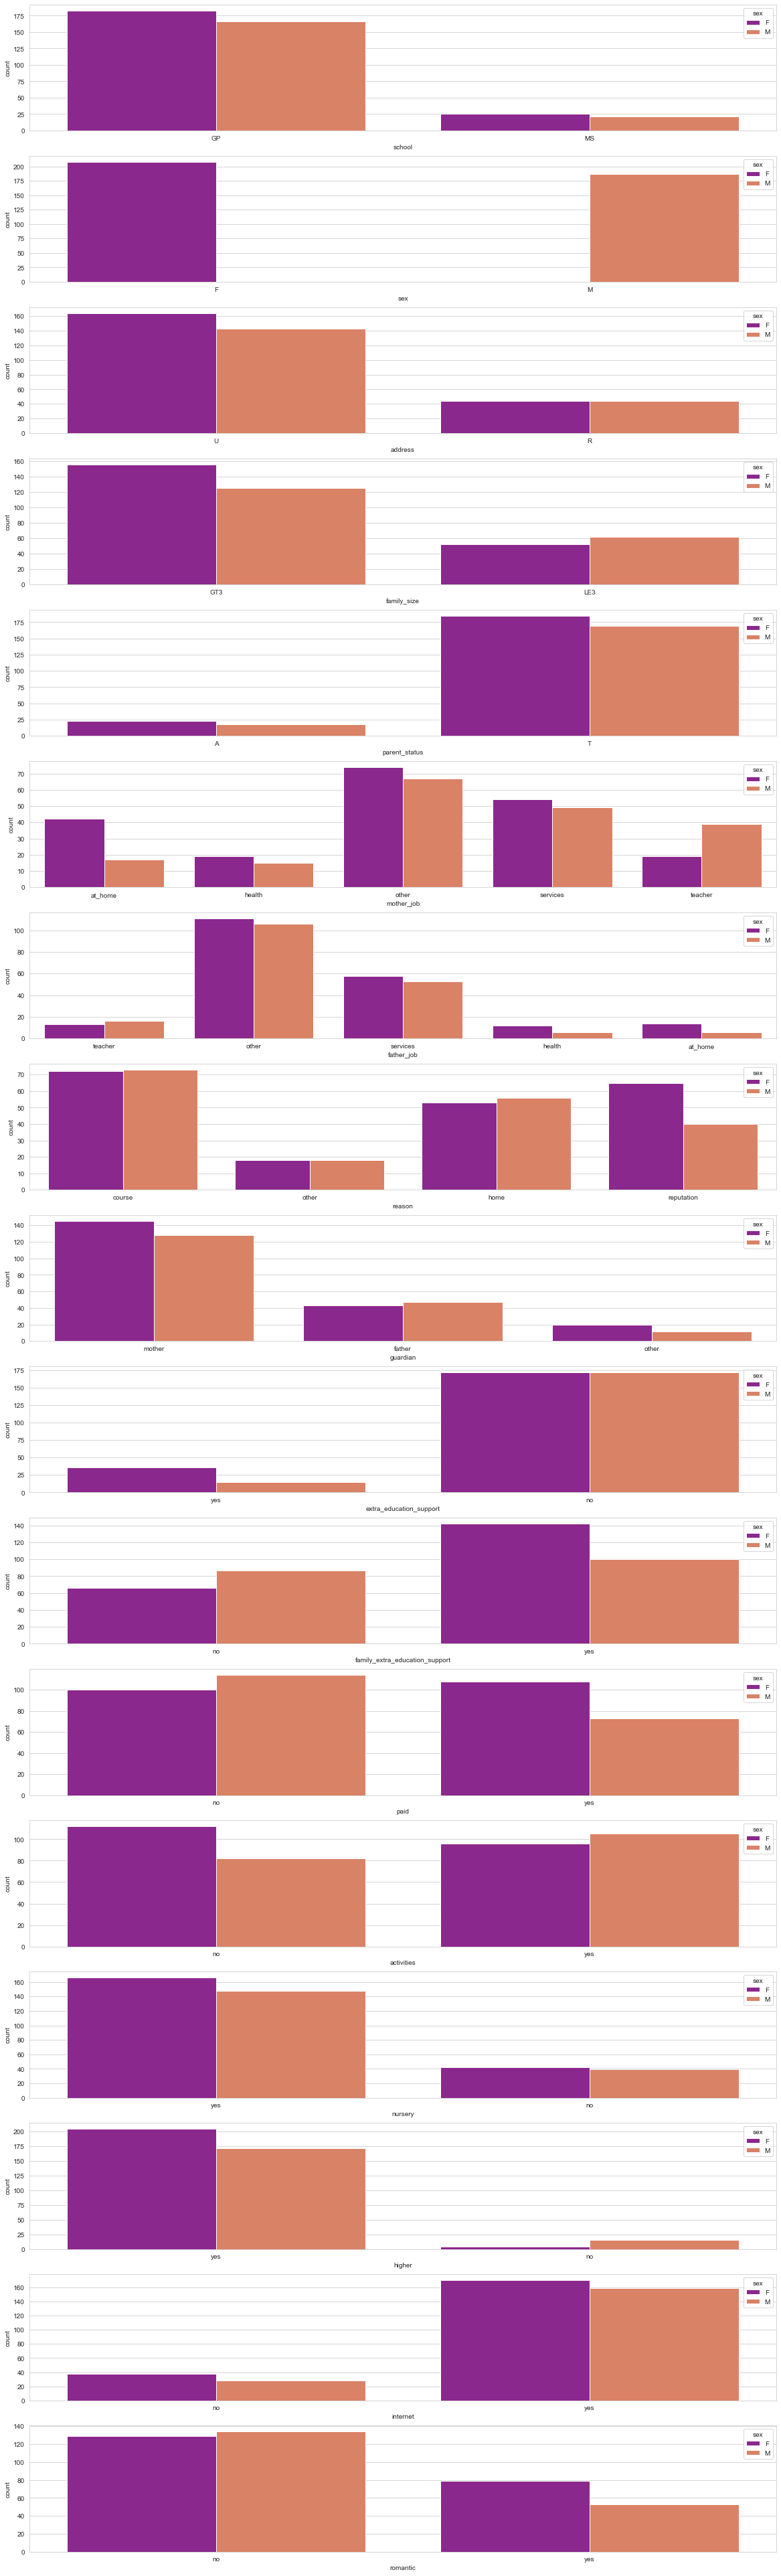

In [13]:
sns.set_style('whitegrid')  
fig, ax = plt.subplots(17, 1, figsize=(20,70))

for x, col in enumerate(df.select_dtypes(include='object').columns):
    sns.countplot(x=df[col], ax=ax[x], hue=df['sex'], palette='plasma')

#### Distributions with hue=sex

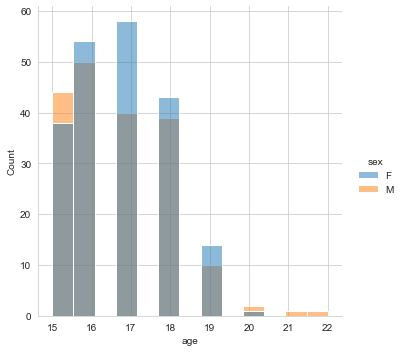

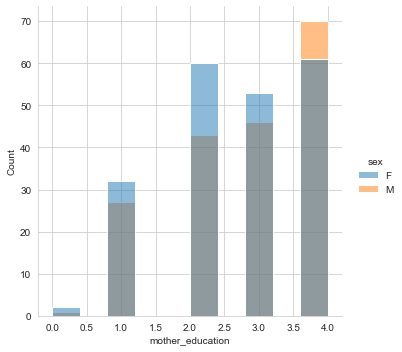

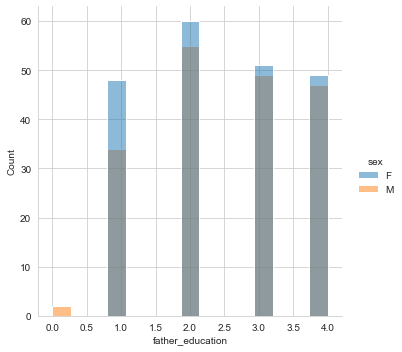

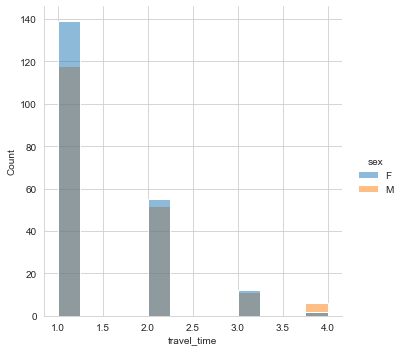

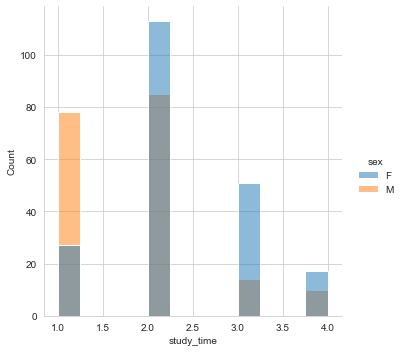

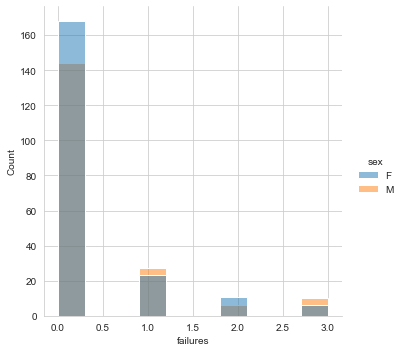

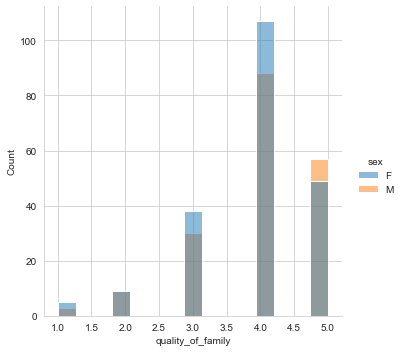

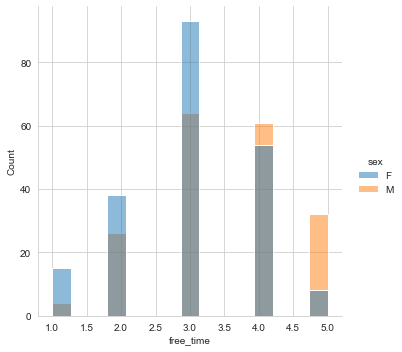

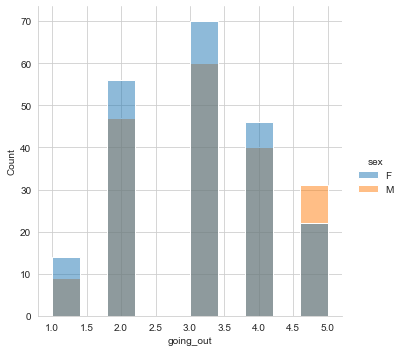

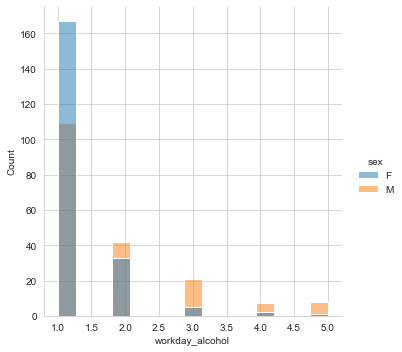

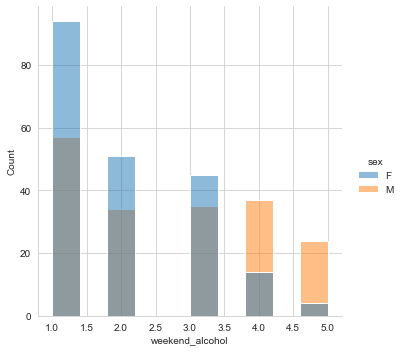

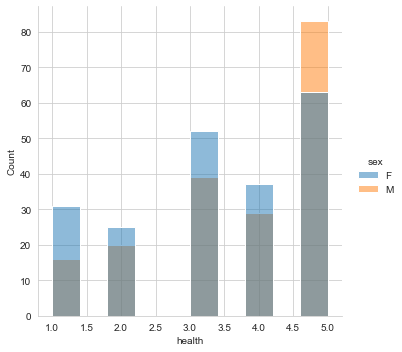

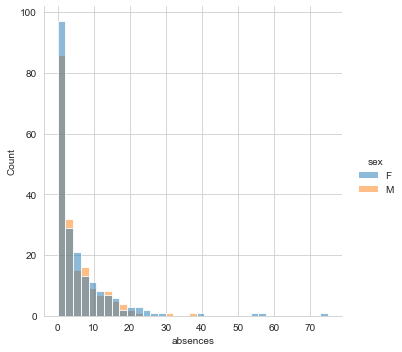

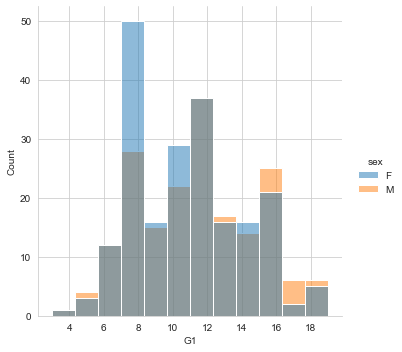

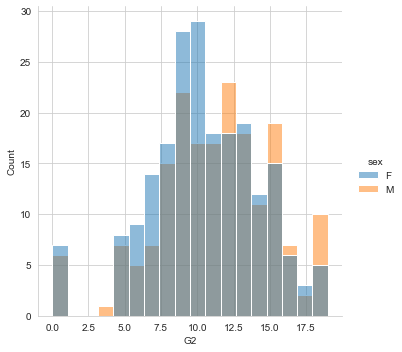

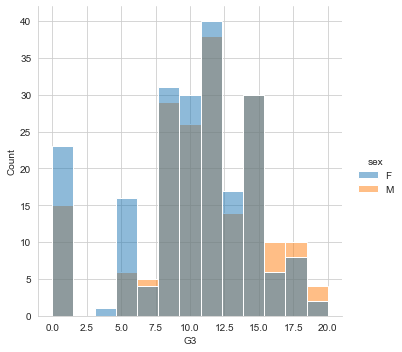

In [14]:
for col in df.select_dtypes(include='number').columns:
        sns.displot(x=df[col], hue=df['sex'])

#### Correlation

In [15]:
df.corr()['G3'].sort_values().iloc[:-1]

failures            -0.360415
age                 -0.161579
going_out           -0.132791
travel_time         -0.117142
health              -0.061335
workday_alcohol     -0.054660
weekend_alcohol     -0.051939
free_time            0.011307
absences             0.034247
quality_of_family    0.051363
study_time           0.097820
father_education     0.152457
mother_education     0.217147
G1                   0.801468
G2                   0.904868
Name: G3, dtype: float64

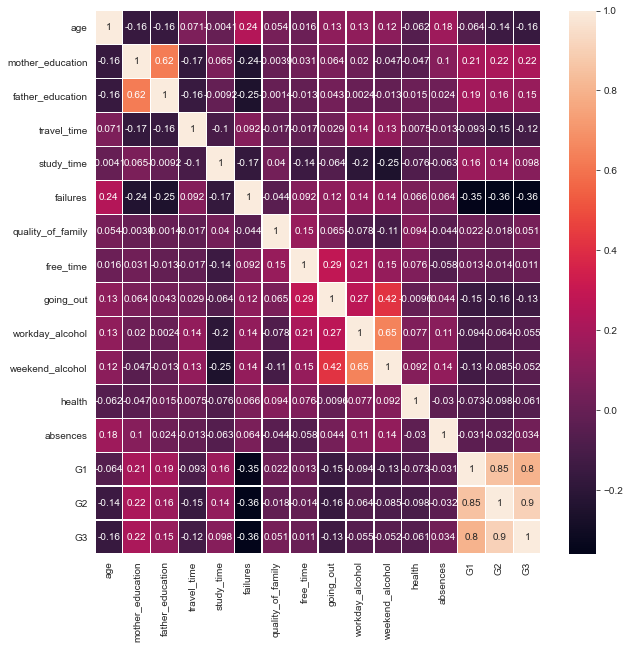

In [16]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax);

In [17]:
# كيف يؤثر عمل الام على درجة الطالب
# Mother job affect
df.groupby('mother_job')[['G3']].describe()

G3                                                  
            count       mean       std  min   25%   50%   75%   max
mother_job                                                         
at_home      59.0   9.152542  4.733642  0.0   8.0  10.0  12.5  19.0
health       34.0  12.147059  4.229280  0.0  10.0  13.0  15.0  20.0
other       141.0   9.822695  4.359364  0.0   8.0  11.0  13.0  19.0
services    103.0  11.019417  4.758853  0.0   9.0  11.0  14.5  19.0
teacher      58.0  11.051724  4.398654  0.0   9.0  11.0  14.0  19.0

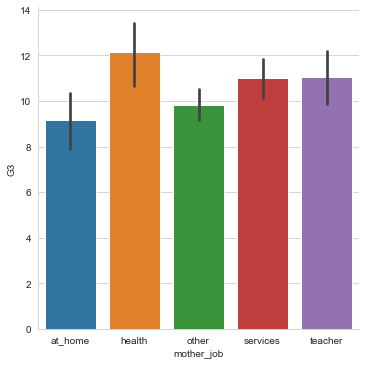

In [18]:
sns.catplot(x="mother_job", y="G3", kind='bar', data=df);

In [19]:
# كيف يؤثر عمل الاب على درجة الطالب
# Father job affect
df.groupby('father_job')[['G3']].describe()

G3                                                    
            count       mean       std  min    25%   50%    75%   max
father_job                                                           
at_home      20.0  10.150000  5.323978  0.0   8.75  11.0  13.25  19.0
health       18.0  11.611111  3.238353  7.0   9.00  11.0  14.00  18.0
other       217.0  10.193548  4.511236  0.0   8.00  11.0  13.00  19.0
services    111.0  10.297297  4.477407  0.0   9.00  11.0  13.00  20.0
teacher      29.0  11.965517  5.486885  0.0  10.00  14.0  16.00  19.0

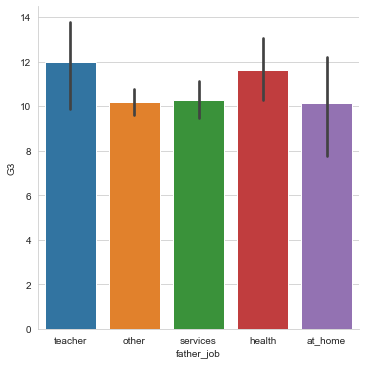

In [20]:
sns.catplot(x="father_job", y="G3", kind="bar", data=df);

In [21]:
# Mother education affect
df.groupby('mother_education')[['G3']].describe()

G3                                                  
                  count       mean       std  min   25%   50%   75%   max
mother_education                                                         
0                   3.0  13.000000  3.464102  9.0  12.0  15.0  15.0  15.0
1                  59.0   8.677966  4.364594  0.0   7.5  10.0  11.0  16.0
2                 103.0   9.728155  4.636163  0.0   8.0  11.0  13.0  19.0
3                  99.0  10.303030  4.623486  0.0   8.0  10.0  13.0  19.0
4                 131.0  11.763359  4.267646  0.0   9.5  12.0  15.0  20.0

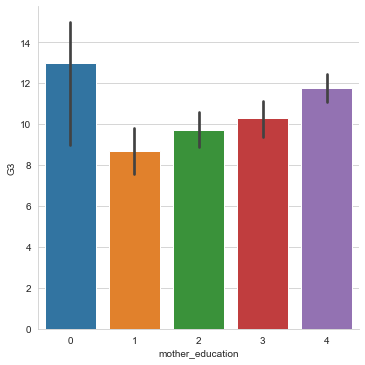

In [22]:
sns.catplot(x="mother_education", y="G3", kind='bar', data=df);

In [23]:
# Father education affect
df.groupby('father_education')[['G3']].describe()

G3                                                     
                  count       mean       std   min    25%   50%    75%   max
father_education                                                            
0                   2.0  13.000000  4.242641  10.0  11.50  13.0  14.50  16.0
1                  82.0   9.158537  4.563596   0.0   7.00  10.0  12.00  18.0
2                 115.0  10.260870  4.733396   0.0   8.50  11.0  13.50  19.0
3                 100.0  10.660000  4.149285   0.0   9.00  10.0  13.00  20.0
4                  96.0  11.364583  4.665934   0.0   9.75  12.0  14.25  19.0

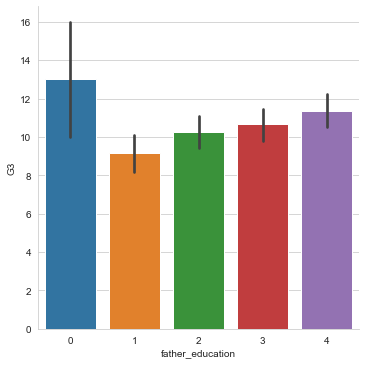

In [24]:
sns.catplot(x="father_education", y="G3", kind='bar', data=df);

In [25]:
# Going out with friends affect
df.groupby('going_out')[['G3']].describe()

G3                                                  
           count       mean       std  min   25%   50%   75%   max
going_out                                                         
1           23.0   9.869565  5.336873  0.0   9.5  11.0  13.0  17.0
2          103.0  11.194175  4.535391  0.0  10.0  12.0  14.0  20.0
3          130.0  10.961538  4.210367  0.0   9.0  11.0  14.0  19.0
4           86.0   9.651163  4.421252  0.0   8.0  10.0  13.0  19.0
5           53.0   9.037736  5.072408  0.0   6.0  10.0  12.0  18.0

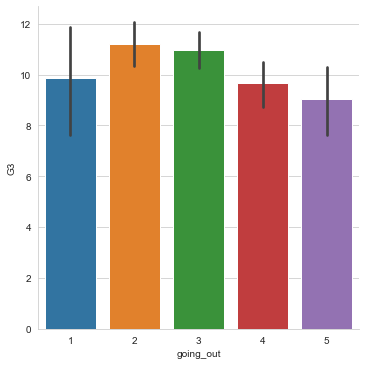

In [26]:
sns.catplot(x="going_out", y="G3", kind='bar', data=df);

In [27]:
# Health affect
df.groupby('health')[['G3']].describe()

G3                                                  
        count       mean       std  min   25%   50%   75%   max
health                                                         
1        47.0  11.872340  4.351996  0.0  10.0  13.0  15.0  19.0
2        45.0  10.222222  5.497474  0.0   8.0  10.0  14.0  20.0
3        91.0  10.010989  4.183286  0.0   8.0  10.0  12.0  19.0
4        66.0  10.106061  4.871041  0.0   8.0  10.0  13.0  19.0
5       146.0  10.397260  4.417020  0.0   8.0  11.0  13.0  18.0

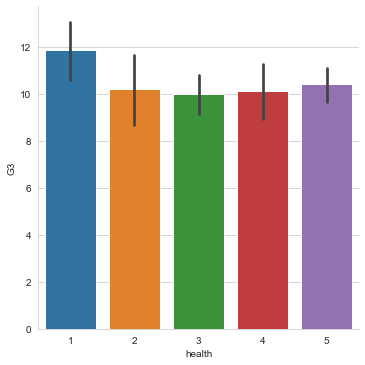

In [28]:
sns.catplot(x="health", y="G3", kind='bar', data=df);

In [29]:
# Parent status affect
df.groupby('parent_status')[['G3']].describe()

G3                                                 
               count       mean       std  min  25%   50%   75%   max
parent_status                                                        
A               41.0  11.195122  4.290801  0.0  9.0  11.0  13.0  19.0
T              354.0  10.324859  4.611121  0.0  8.0  11.0  14.0  20.0

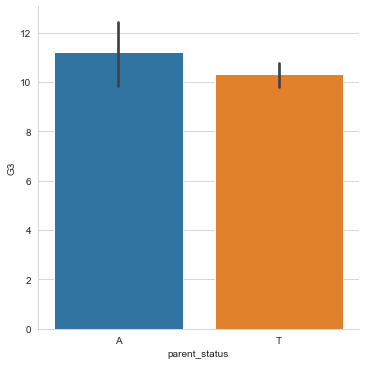

In [30]:
sns.catplot(x="parent_status", y="G3", kind='bar', data=df);

In [31]:
# Free time affect
df.groupby('free_time')[['G3']].describe()

G3                                                   
           count       mean       std  min   25%   50%    75%   max
free_time                                                          
1           19.0   9.842105  4.752346  0.0   8.0  10.0  12.00  18.0
2           64.0  11.562500  4.219663  0.0  10.0  12.0  14.00  20.0
3          157.0   9.783439  4.794920  0.0   8.0  10.0  13.00  19.0
4          115.0  10.426087  4.330757  0.0   8.0  11.0  13.50  19.0
5           40.0  11.300000  4.619912  0.0   9.0  11.5  14.25  19.0

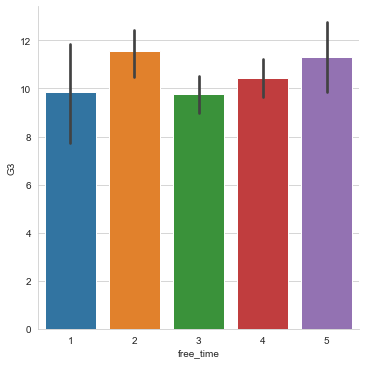

In [32]:
sns.catplot(x="free_time", y="G3", kind='bar', data=df);

In [33]:
# Study time affect
df.groupby('study_time')[['G3']].describe()

G3                                                  
            count       mean       std  min   25%   50%   75%   max
study_time                                                         
1           105.0  10.047619  4.956311  0.0   8.0  10.0  13.0  19.0
2           198.0  10.171717  4.217537  0.0   8.0  11.0  13.0  19.0
3            65.0  11.400000  4.639504  0.0  10.0  12.0  15.0  19.0
4            27.0  11.259259  5.281263  0.0   9.0  12.0  14.5  20.0

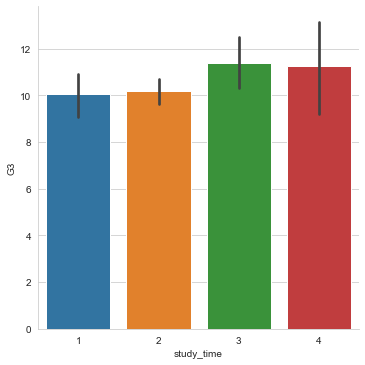

In [34]:
sns.catplot(x="study_time", y="G3", kind='bar', data=df);

In [35]:
# Address affect
df.groupby('address')[['G3']].describe()

G3                                                 
         count       mean       std  min  25%   50%   75%   max
address                                                        
R         88.0   9.511364  4.556149  0.0  7.0  10.0  12.0  19.0
U        307.0  10.674267  4.563075  0.0  9.0  11.0  14.0  20.0

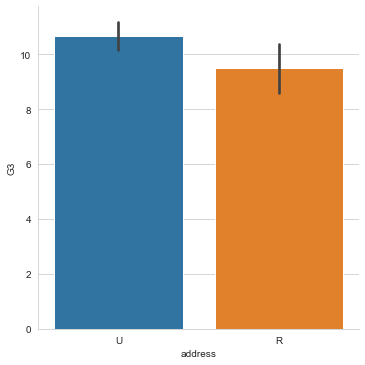

In [36]:
sns.catplot(x="address", y="G3", kind='bar', data=df);

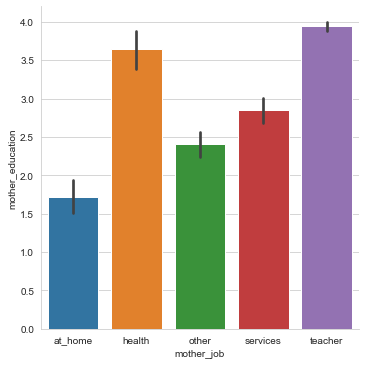

In [37]:
# Job x Education (mother)
sns.catplot(x="mother_job", y="mother_education", kind='bar', data=df);

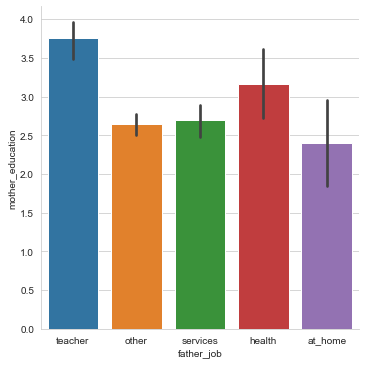

In [38]:
# Job x Education (father)
sns.catplot(x="father_job", y="mother_education", kind='bar', data=df);

#### Replace the categorical values with a numeric values

In [40]:
encoder = LabelEncoder()
columns_to_replace = df.select_dtypes(include='object').columns

for col in columns_to_replace:
    df[col] = encoder.fit_transform(df[col])

In [41]:
df.head(3)

,school,sex,age,address,family_size,parent_status,mother_education,father_education,mother_job,father_job,...,quality_of_family,free_time,going_out,workday_alcohol,weekend_alcohol,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10


#### The correlation after replace the categorical values with a numeric values

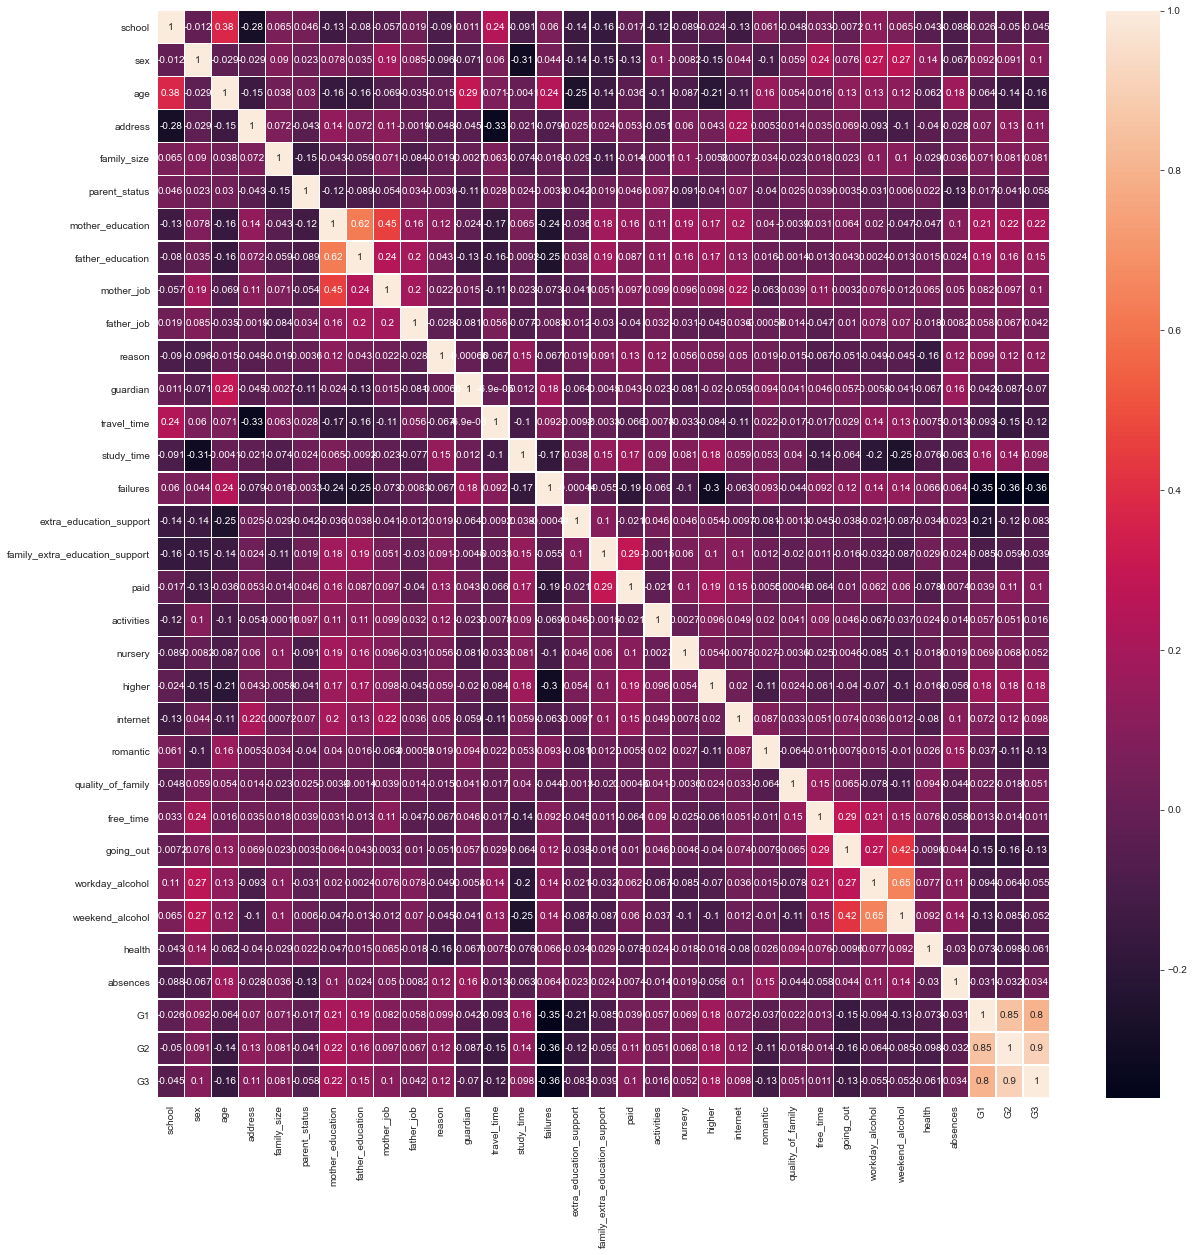

In [42]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax);

In [43]:
df.corr()['G3'].sort_values().iloc[:-1]

failures                         -0.360415
age                              -0.161579
going_out                        -0.132791
romantic                         -0.129970
travel_time                      -0.117142
extra_education_support          -0.082788
guardian                         -0.070109
health                           -0.061335
parent_status                    -0.058009
workday_alcohol                  -0.054660
weekend_alcohol                  -0.051939
school                           -0.045017
family_extra_education_support   -0.039157
free_time                         0.011307
activities                        0.016100
absences                          0.034247
father_job                        0.042286
quality_of_family                 0.051363
nursery                           0.051568
family_size                       0.081407
study_time                        0.097820
internet                          0.098483
paid                              0.101996
mother_job 

#### Drop school column

In [44]:
df.drop(columns='school', inplace=True)

#### Get most correlated

In [68]:
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated = most_correlated[:16]

df = df.loc[:, most_correlated.index]
df.head()

,G3,G2,G1,failures,mother_education,higher,age,father_education,going_out,romantic,reason,travel_time,address,sex,mother_job,paid
0,6,6,5,0,4,1,18,4,4,0,0,2,1,0,0,0
1,6,5,5,0,1,1,17,1,3,0,0,1,1,0,0,0
2,10,8,7,3,1,1,15,1,2,0,2,1,1,0,0,1
3,15,14,15,0,4,1,15,2,2,1,1,1,1,0,1,1
4,10,10,6,0,3,1,16,3,2,0,1,1,1,0,2,1


#### Split to train, test

In [62]:
X = df.drop(columns='G3', axis='columns')
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [66]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test) # predict

#### Mean absolute error

In [67]:
mean_absolute_error(y_test, y_pred)

1.0608692940032693